# Designing IIR Digital Filters with indirect methods

DSP Lab 11

## 1 Objective

Use filter design functions in Matlab and the Filter Design and Analysis
tool quick IIR filter design and evaluation.

## 2 Theoretical notions

### Filter specifications and terminology

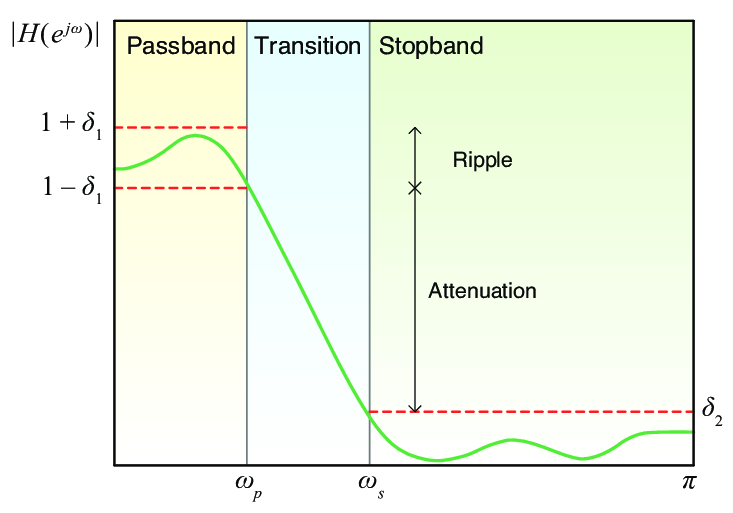

### Poles and zeros

In this class, we frequently used Z transforms with polynomials as
numerator and denominator, denoted as $B(z)$ (numerator) and $A(z)$
(denominator). Any polynomial is completely determined by its roots and
a scaling factor.

Poles and zeros:

-   the **zeros** of $X(z)$ are the roots of the numerator $B(z)$
-   the **poles** of $X(z)$ are the roots of the denominator $A(z)$

The zeros are usually named $z_1, z_2, ... z_M$, and the poles
$p_1, p_2, ... p_N$.

The poles and zeros are typically represented graphically in the complex
plane, and in simple cases their position can indicate rapidly some
properties of the filters.

In this laboratory we will study how the position of zeros and poles
influences the magnitude and phase response of a filter.

### Filter Design and Analysis Toolbox

Digital filters are a key tool in many fields, including engineering,
science, and economics. They are used to process and analyze signals,
and can perform a wide range of tasks, such as noise reduction, echo
cancellation, and system identification. In this paper, we will discuss
the use of FDAtool in MATLAB for designing digital filters.

FDATool, or the Filter Design and Analysis Toolbox, is a graphical user
interface (GUI) that allows users to easily design and implement digital
filters in MATLAB. It provides a convenient and user-friendly way to
design and analyze filters, and generate code for implementation in
other programs.

To use FDATool, users first need to launch it from the MATLAB command
window by typing `fdatool` and pressing enter. This will open the
FDATool GUI, which consists of three main windows: the Filter Design and
Analysis Tool, the Filter Visualization Tool, and the Filter
Implementation Tool.

## 3 Matlab functions for filter design

### IIR filter design, indirect methods

These functions first design an analog low-pass prorotype filter, and
then convert it into the required digital filter using the bilinear
transformation.

Design functions:

-   `butter()`: This function designs a Butterworth filter, which has a
    maximally flat frequency response in the passband.

-   `cheby1()`: This function designs a Chebyshev type I filter, which
    has a steeper roll-off and more ripple in the passband than a
    Butterworth filter.

-   `cheby2()`: This function designs a Chebyshev type II filter, which
    has less steep roll-off than Chebyshev type I, but less ripple in
    the passband

-   `ellip()`: This function designs an elliptical filter, which has a
    steeper roll-off and more ripple in both the passband and stopband
    than a Chebyshev type I filter.

Functions to find the minimum filter order according to specifications:

-   `buttord()`, `cheb1ord`, `cheb2ord()`, `ellipord()`

### FIR filter design

-   `fir1()`: This function designs a finite impulse response (FIR)
    filter with a specified frequency response.

-   `firpm()`: This function designs a minimum-phase FIR filter using a
    specified magnitude response.

-   `kaiser()`: This function designs a Kaiser window filter, which can
    be used to design FIR filters with a specified stopband attenuation
    and transition width.

-   and several others

### Visualization functions

-   `fvtool(b, a)`: Filter visualization tool
-   `freqz(b, a)`: Compute and display frequency response
-   `zplane(b, a)`: Display pole-zero plot
-   `impz(b, a)`: Compute and display impulse response

### Examples

#### Butterworth filter, IIR, low-pass

This code uses the `buttord()` function to compute the filter order and
cut-off frequency based on the specified passband and stopband
frequencies, as well as the passband ripple and stopband attenuation.
The `butter()` function is then used to design a Butterworth filter with
these parameters. The `freqz()` function is used to plot the frequency
response of the filter. You can adjust the filter specifications as
needed to meet your design requirements

``` matlab
% Define the filter specifications
Fpass = 0.2;   % Passband-edge frequency
Fstop = 0.3;   % Stopband-edge frequency
Apass = 1;     % Passband ripple (dB)
Astop = 60;    % Stopband attenuation (dB)

% Compute the filter order and cutoff frequency
[N, Wn] = buttord(Fpass, Fstop, Apass, Astop);

% Design the Butterworth filter using the butter function
[b,a] = butter(N, Wn);

% Plot the frequency response of the filter
freqz(b,a);
```

#### Chebyshev type I, IIR, high-pass

``` matlab
% Define the filter specifications
Fpass = 0.2;   % Passband-edge frequency
Fstop = 0.3;   % Stopband-edge frequency
Apass = 1;     % Passband ripple (dB)
Astop = 60;    % Stopband attenuation (dB)

% Compute the filter order and cutoff frequency
[N, Wn] = cheb1ord(Fpass, Fstop, Apass, Astop);

% Design the Chebyshev type I filter using the cheby1 function
[b,a] = cheby1(N, Apass, Wn);

% Plot the frequency response of the filter
fvtool(b,a);
```

#### Chebyshev type 2, IIR, stop-band

``` matlab
Wp = [75 250]/500;    % Band-pass frequencies, larger than the stop-band
Ws = [100 200]/500;   % Stop-band frequencies
Rp = 3;               % Passband ripple (dB)
Rs = 40;              % Stopband attenuation (dB)

% Compute the filter order and cutoff frequencies
[N, Wn] = cheb2ord(Wp, Ws, Rp, Rs);

% Design the Chebyshev type II filter using the cheby2 function
[b,a] = cheby2(N, Rs, Wn, 'stop');

% Plot the frequency response of the filter
fvtool(b,a);

% Show the pole-zero plot
zplane(b,a)
```

#### Elliptic, IIR, band-pass

``` matlab
Wp = [200 250]/1000;   % Band-pass frequencies, larger than the stop-band
Ws = [175 275]/1000;   % Stop-band frequencies
Rp = 3;                % Passband ripple (dB)
Rs = 40;               % Stopband attenuation (dB)

% Compute the filter order and cutoff frequencies
[N, Wn] = ellipord(Wp, Ws, Rp, Rs);

% Design the Elliptic filter using the ellip function
[b,a] = ellip(N, Rp, Rs, Wn, 'bandpass');

% Plot the frequency response of the filter
freqz(b,a);

% Show the impulse response, first 40 samples
h = impz(b,a,40);
figure()
stem(h)
```

#### Filtering with `filter()`

Given a filter with coefficients `a` and `b`, filtering a signal `x` can
be done with `filter()`:

``` matlab
% Generate a signal
x = ones(1, 100);

% Design a filter
[b,a] = butter(10, 0.2);

% Filter
y = filter(b,a, x)

% Plot
stem(x);
hold on;
stem(y, 'r');   % The 'r' flag indicates to use the color red
hold off
```

## 4 Exercises

### Exercise 1: Designing a Chebyshev I Low-Pass Filter, FDATool

In this exercise, we will use FDATool to design a low-pass filter

1.  Launch FDATool
2.  Design a Chebyshev I low-Pass filter of order 3, IIR, with cutoff
    frequency of 500 Hz for a sampling frequency of 5000Hz, and other
    parameters as desired.
3.  In the Filter Visualization Tool, visualize the frequency response
    of the filter.
4.  Visualize the pole-zero plot of the system function $H(z)$
5.  Visualize the filter coefficients.
6.  Export the filter coefficients to Matlab’s workspace

### Exercise 2: Designing a Chebyshev I Low-Pass Filter, code

Use Matlab code to design the same filter:

1.  Design a Chebyshev I low-pass filter of order 3, IIR, with cutoff
    frequency of 500 Hz for a sampling frequency of 5000Hz, and
    pass-band ripple of 0.2 dB
2.  Plot the frequency response
3.  Display the pole-zero plot
4.  Plot the impulse response

### Exercise 3: Designing a Butterworth High-Pass Filter, FDATool

Repeat the steps in exercise 1, to design a high-pass Butterworth filter
of minimum order, IIR, with a transition zone between 0.2 and 0.25 (or
2000 to 2500Hz Hz for a sampling frequency of 10000Hz), with an passband
ripple of 2 dB and a minimum stop-band attenuation of 60 dB.

### Exercise 4: Designing a Butterworth High-Pass Filter, code

Use Matlab code to design the same filter:

1.  Design a high-pass Butterworth filter of minimum order, IIR, with a
    transition zone between 0.2 and 0.25 (or 2000 to 2500Hz Hz for a
    sampling frequency of 10000Hz), with an passband ripple of 2 dB and
    a minimum stop-band attenuation of 60 dB.
2.  Plot the frequency response
3.  Display the pole-zero plot
4.  Plot the impulse response

### Exercise 5: Designing a Elliptic Band-Pass Filter, FDATool

Repeat the steps in exercise 1, to design a band-pass elliptic filter of
minium order, IIR, with pass-band between 0.25 and 0.3 (or 2500 Hz to
3000 Hz for a sampling frequency of 5000Hz ), transition bands of width
0.02, a passband ripple of 0.5 dB and a minimum stop-band attenuation of
50 dB.

### Exercise 6: Designing a Elliptic Band-Pass Filter, code

Repeat previous exercise, but this time use the Matlab functions instead
of FDATool.

1.  Design a band-pass elliptic filter of minimum order, IIR, with
    pass-band between 0.25 and 0.3 (or 2500 Hz to 3000 Hz for a sampling
    frequency of 5000Hz ), transition bands of width 0.02, a passband
    ripple of 0.5 dB and a minimum stop-band attenuation of 50 dB.
2.  Plot the frequency response
3.  Display the pole-zero plot
4.  Plot the impulse response

### Exercise 7: Filtering a Signal

In this exercise, we will use the filters designed in the previous
exercises to filter a signal.

1.  Generate a 300-long periodic square signal, composed of 30 values of
    1 followed by 30 values of 0, repeated for 5 times.

2.  Filter the signal with the filter obtained in Exercise 1/2.

3.  Filter the signal with the filter obtained in Exercise 3/4.

4.  Filter the signal with the filter obtained in Exercise 5/6.

5.  Visualize the filtered signals and compare them to the original
    signal.

### Exercise 8: Filtering a sinusoidal signal

Repeat previous exercise, but this time filter the following signal:

$$s(n) = 2 \cdot \sin(2 \pi 0.15 n + \frac{\pi}{4})$$